In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data import and exploration
---

In [4]:
data = pd.read_csv("mpg.txt", delim_whitespace = True)
print(data.shape)
print(type(data))
print(data.info())
data.describe()
print(data.dtypes)
data.columns = data.columns.str.strip()
print(data.columns)

(398, 9)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')


---
Data manipulation
---

In [5]:
print(data["mpg"].head())
print(data.loc[:5,"car_name"])
print(data.iloc[0:5,1:5])
print(data.loc[2:3]) # this prints 2 lines
print(data.iloc[2:3]) # this only prints 1 line
print(data.iloc[0,1:3]) # this prints 2 values

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64
0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
5             ford galaxie 500
Name: car_name, dtype: object
   cylinders  displacement horsepower  weight
0          8         307.0      130.0  3504.0
1          8         350.0      165.0  3693.0
2          8         318.0      150.0  3436.0
3          8         304.0      150.0  3433.0
4          8         302.0      140.0  3449.0
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   

   origin            car_name  
2       1  plymouth satellite  
3       1       amc rebel sst  
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
2  18.0    

In [6]:
data["origin_cat"] = data["origin"].astype("category")
print(data.dtypes)
print(data.origin_cat.cat.categories)

mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight           float64
acceleration     float64
model_year         int64
origin             int64
car_name          object
origin_cat      category
dtype: object
Int64Index([1, 2, 3], dtype='int64')


In [7]:
print(pd.isnull(data).sum())
data["na_col"] = [np.random.randint(10) for x in data.origin]
na_inds = np.random.choice(np.arange(0,len(data)-1),10, replace = False)
data.loc[na_inds, "na_col"] = np.nan
pd.isnull(data).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
origin_cat      0
dtype: int64


mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model_year       0
origin           0
car_name         0
origin_cat       0
na_col          10
dtype: int64

In [8]:
data.groupby("origin").mean()

,mpg,cylinders,displacement,weight,acceleration,model_year,na_col
origin,,,,,,,
1,20.083534,6.248996,245.901606,3361.931727,15.033735,75.610442,4.329218
2,27.891429,4.157143,109.142857,2423.300000,16.787143,75.814286,4.557143
3,30.450633,4.101266,102.708861,2221.227848,16.172152,77.443038,4.320000


---
# Modeling

In [9]:
y = data.horsepower.replace("?", np.nan).astype("float64")
y = y.fillna(y.mean())

X = data.drop(["na_col", "car_name", "origin", y.name], axis=1)
X = pd.get_dummies(X, columns = ["cylinders", 'origin_cat'])

feature_list = list(X.columns)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

MSE = ((y_pred - y_test)**2).mean()
print('RMSE =', round(np.sqrt(MSE), 2))

MSE2 = mean_squared_error(y_test, y_pred)
print('RMSE2 =', round(np.sqrt(MSE2), 2))

# mean absolute percentage error
mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

RMSE = 12.34
RMSE2 = 12.34
Accuracy: 90.3 %.


RMSE = 12.41
Accuracy: 91.26 %.
Variable: displacement         Importance: 0.78
Variable: weight               Importance: 0.07
Variable: acceleration         Importance: 0.05
Variable: mpg                  Importance: 0.04
Variable: cylinders_8          Importance: 0.04
Variable: model_year           Importance: 0.02
Variable: cylinders_3          Importance: 0.0
Variable: cylinders_4          Importance: 0.0
Variable: cylinders_5          Importance: 0.0
Variable: cylinders_6          Importance: 0.0
Variable: origin_cat_1         Importance: 0.0
Variable: origin_cat_2         Importance: 0.0
Variable: origin_cat_3         Importance: 0.0
displacement    0.775027
weight          0.071334
acceleration    0.050703
mpg             0.042728
cylinders_8     0.035642
model_year      0.017685
origin_cat_1    0.001822
origin_cat_3    0.001522
origin_cat_2    0.001342
cylinders_6     0.000953
cylinders_4     0.000927
cylinders_3     0.000209
cylinders_5     0.000105
dtype: float64


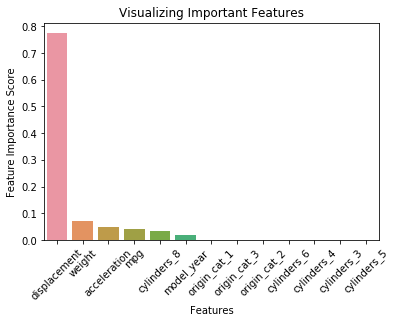

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

MSE = ((y_pred - y_test)**2).mean()

print('RMSE =', round(np.sqrt(MSE), 2))

mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_imp = pd.Series(rf.feature_importances_, index = feature_list).sort_values(ascending=False)
print(feature_imp)

%matplotlib inline
plot = sns.barplot(y=feature_imp, x=feature_imp.index)

for x in plot.get_xticklabels():
    x.set_rotation(45)

plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.show()

RMSE = 137.57
Accuracy: 90.83 %.
Variable: displacement         Importance: 0.82
Variable: weight               Importance: 0.08
Variable: acceleration         Importance: 0.06
Variable: mpg                  Importance: 0.05
displacement    0.816526
weight          0.077755
acceleration    0.055805
mpg             0.049913
dtype: float64


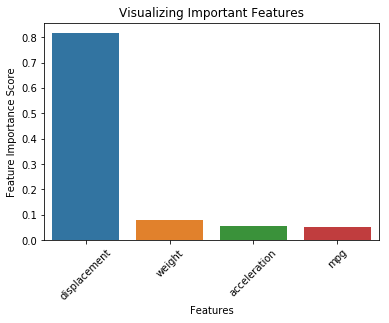

In [144]:
#reduced model

z = list(zip(feature_list, importances))

important_features = [x1 for (x1, x2) in z if x2 > 0.04]

X = data[important_features]

feature_list = list(X.columns)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

MSE = ((y_pred - y_test)**2).sum()

print('RMSE =', round(np.sqrt(MSE), 2))

mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_imp = pd.Series(rf.feature_importances_, index = feature_list).sort_values(ascending=False)
print(feature_imp)

%matplotlib inline
plot = sns.barplot(y=feature_imp, x=feature_imp.index)

for x in plot.get_xticklabels():
    x.set_rotation(45)

plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## PCA decomposition

In [148]:
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(X)
X = pca.transform(X)
print(X[:5])

[[  5.43091963e+02   5.19066422e+01  -6.23453730e-01  -1.15629795e+00]
 [  7.35786545e+02   7.30356332e+01  -1.79056703e+00  -6.54580502e-01]
 [  4.76798754e+02   7.06394360e+01  -8.63757266e-01  -1.64117248e+00]
 [  4.72231900e+02   5.70834520e+01  -3.07382895e+00  -9.37806130e-01]
 [  4.87892276e+02   5.32987261e+01  -2.11521139e+00  -2.59898372e+00]]


Best parameter (CV score=0.789):
{'pca__n_components': 6}


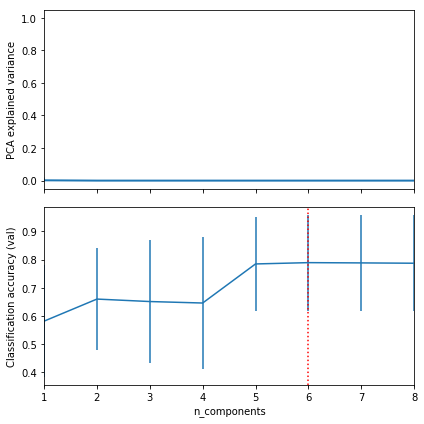

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
lr = LinearRegression()
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('linear', lr)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': np.arange(1,9)
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5,
                      return_train_score=False)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()